## Augmenting data
When deciding the method to employ in order to augment data special attention was given over how to treat the boundaries, three options came to mind:

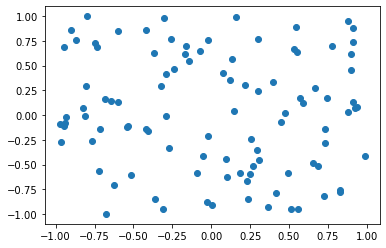

In [1]:
#import necessary libraries and create dummy dataset
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr
N = 100
data = 2*npr.rand(2,N)-1
plt.scatter(data[1,:],data[0,:])
plt.show()

1) simply adding random noise

Easy to implement but the training region will end up being bigger than the validation (and original data) region

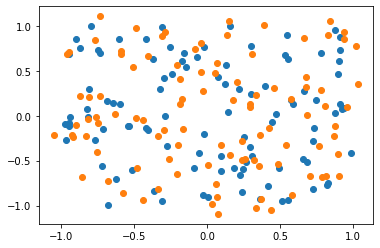

In [2]:
alpha = 0.2
data_aug = data + alpha*(2*npr.rand(2,N)-1)
plt.scatter(data[1,:],data[0,:])
plt.scatter(data_aug[1],data_aug[0])
plt.show()

2) adding random noise and truncate the new data to be inside the original boundaries

Also easy to implement via a mask but the augmented data density will be lower along the borders of the dataset due to the rejection of newly generated points

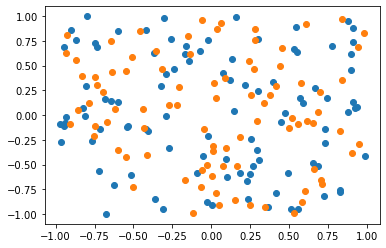

In [3]:
data_aug = data + alpha*(2*npr.rand(2,N)-1)

# Boolean mask to remove points outside of [-1,1] in x or y coordinate
mask = (np.abs(data_aug[0]) <= 1) & (np.abs(data_aug[1]) <= 1)
data_aug = data_aug[:, mask]


plt.scatter(data[1,:],data[0,:])
plt.scatter(data_aug[0], data_aug[1])
plt.show()

3) adding random noise and treat the boundaries as a sort of "wall" on which points outside the boundary reflect, for example if x_generated=1.03 the final x_fixed=0.97 as if it reflected along the boundary

Slightly more difficult to implement but it should solve both the issues found in the previous methods

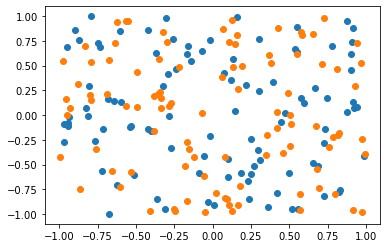

In [4]:
data_aug = data + alpha*(2*npr.rand(2,N)-1)

# reflect points outside of [-1,1] in x or y coordinate
data_aug[0] = np.where(np.abs(data_aug[0]) <= 1, data_aug[0], np.sign(data_aug[0]) * (2 - np.abs(data_aug[0])))
data_aug[1] = np.where(np.abs(data_aug[1]) <= 1, data_aug[1], np.sign(data_aug[1]) * (2 - np.abs(data_aug[1])))


plt.scatter(data[1,:],data[0,:])
plt.scatter(data_aug[0], data_aug[1])
plt.show()